## BACxDeloitte Hackathon 2022
### Machine Learning Model Generation and Testing - Fraud Detection through DBSCAN


In [1]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mysql.connector

Note: you may need to restart the kernel to use updated packages.


In [5]:
#pip install MySQLclient

In [117]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import numpy as np 
import seaborn as sns 
import sqlalchemy as db
import atoti as tt 
import mysql.connector 
from mysql.connector import Error

In [5]:
def create_db_connection():
    connection = None
    try:
        connection = mysql.connector.connect(
            host="bac.c5spguzjvsqr.ap-southeast-1.rds.amazonaws.com",
            user="admin",
            passwd= "^IW[qN8cs]znCPK2XE",
            database="bac"
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [6]:
cn = create_db_connection()

MySQL Database connection successful


In [7]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [8]:
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return pd.DataFrame(result, columns= list(cursor.column_names))
    except Error as err:
        print(f"Error: '{err}'")

In [27]:
full_data

,Employee Number,Company,Vendor Location,Vendor Name,Custom Merchant Category,Creditor Merchant Category,Comment,Expense Date,Status,Tax Code,Expense Amount,Net Amount,Tax Amount,Authorised By,Transaction ID,Country
37684,0036145,3000,WOLLONGONG,REGIONAL EXPRESS BSP,Travel Domestic Airfares,AIRLINES (EXCLUDING THOSE WITH,Durham/Sarah,2021-09-13,SENT_TO_GL,P1,263.60,239.64,23.96,NaN,12752251,Singapore
41964,0056690,3000,WOLLONGONG,CALTEX STAR MART WOL,Travel Domestic Private MV Exp,SERVICE STATIONS,fuel for small plant,2021-09-12,SENT_TO_GL,P1,136.97,124.52,12.45,77778673.0,12178,Singapore
29669,0036910,3000,GOULBURN,AUTO ONE GOULBURN PTY,Repairs & Maintenance Motor Ve,"MOTOR PARTS, ACCESSORIES STORE","20L PLASTIC 35070, DIESEL CAN",2021-11-15,SENT_TO_GL,P1,92.50,84.09,8.41,77777723.0,362378,Singapore
49047,0036679,3000,BEGA,STEEL SUPPLIES BEGA,Minor Equipment Under 5k,MISC & SPECIALTY RETAIL STORES,"JN48951, Mild steel angle",2021-11-27,SENT_TO_GL,P1,88.35,80.32,8.03,77782998.0,83454,Singapore
63780,0037192,3000,DUBBO,RMSTOLLNOTICEPH13186,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM",myE-Toll testing new applicati,2021-09-26,SENT_TO_GL,P1,5.50,5.00,0.50,77777898.0,2267882215,Singapore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57340,0071641,3000,DUBBO,BATTERY WORLD DUBBO,Travel Domestic Private MV Exp,W/SALE MOTOR VEHICLE SUPPLIES,Batteries For Traffic Signal R,2021-08-02,SENT_TO_GL,P1,497.20,452.00,45.20,12363630.0,32310002731,Singapore
65891,0042816,3000,BOWENFELS,OFFICEWORKS 0250,Stationery,"STATIONERY, OFFICE AND SCHOOL",Filing Cabinet Dividers-Nathan,2021-09-24,SENT_TO_GL,P1,26.61,24.19,2.42,NaN,9136250000000000,Singapore
28215,0231304,3000,WAGGA WAGGA,SERVICE FIRST REGISTRA,Default Licensee Merchant Cat,STENOGRAPHIC SERVICES,Property Online Searches $12.0,2021-08-08,SENT_TO_GL,P1,12.09,10.99,1.10,12368778.0,256377,Singapore
10523,0037076,3000,DUBBO,KWIK KOPY PG CR MLR,Photocopying,QUICK COPY REPRODUCTION SERVIC,Griffith RIF 3 Posters,2021-11-08,SENT_TO_GL,P1,404.80,368.00,36.80,12378678.0,19123,Singapore


In [42]:
full_data = full_data.drop(["Creditor Merchant Category", "Comment"], axis=1)

In [49]:
full_data['Expense Date'] = full_data['Expense Date'].dt.strftime('%Y-%m-%d')

In [73]:
full_data

,Employee Number,Company,Expense Amount,Net Amount,Tax Amount,Authorised By,Order Day new
37684,0036145,3000,263.60,239.64,23.96,NaN,2021-09-13
41964,0056690,3000,136.97,124.52,12.45,77778673.0,2021-09-12
29669,0036910,3000,92.50,84.09,8.41,77777723.0,2021-11-15
49047,0036679,3000,88.35,80.32,8.03,77782998.0,2021-11-27
63780,0037192,3000,5.50,5.00,0.50,77777898.0,2021-09-26
...,...,...,...,...,...,...,...
57340,0071641,3000,497.20,452.00,45.20,12363630.0,2021-08-02
65891,0042816,3000,26.61,24.19,2.42,NaN,2021-09-24
28215,0231304,3000,12.09,10.99,1.10,12368778.0,2021-08-08
10523,0037076,3000,404.80,368.00,36.80,12378678.0,2021-11-08


In [78]:
full_data = full_data.dropna()

In [85]:
full_data.dtypes

Employee Number     object
Company              int64
Expense Amount     float64
Net Amount         float64
Tax Amount         float64
Authorised By      float64
dtype: object

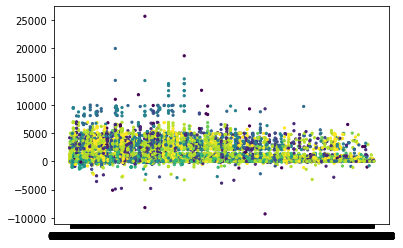

In [244]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 10, covariance_type = 'full').fit(full_data)
labels = gmm.predict(full_data)

plt.scatter(full_data["Employee Number"], full_data["Expense Amount"], c=labels, s=5, cmap='viridis');
plt.savefig("item1.png")

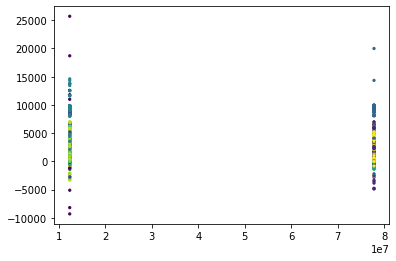

In [245]:
plt.scatter(full_data["Authorised By"], full_data["Expense Amount"], c=labels, s=5, cmap='viridis')

In [246]:
from sklearn.cluster import DBSCAN
import random

random.seed(1)
outlier_detection = DBSCAN(min_samples = 2, eps=7)
clusters = outlier_detection.fit_predict(full_data)
list(clusters).count(-1)

16980

In [247]:
full_data

,Employee Number,Company,Expense Amount,Net Amount,Tax Amount,Authorised By,DBSCAN_labels,DBSCAN_opt_labels
41964,0056690,3000,136.97,124.52,12.45,77778673.0,-1,0
29669,0036910,3000,92.50,84.09,8.41,77777723.0,-1,1
49047,0036679,3000,88.35,80.32,8.03,77782998.0,-1,1
63780,0037192,3000,5.50,5.00,0.50,77777898.0,-1,1
35922,0036988,3000,795.30,723.00,72.30,12346492.0,-1,1
...,...,...,...,...,...,...,...,...
59521,0210663,3000,4125.00,3750.00,375.00,77782648.0,-1,19
42401,0038376,3000,4.50,4.09,0.41,12351156.0,166,1
57340,0071641,3000,497.20,452.00,45.20,12363630.0,-1,0
28215,0231304,3000,12.09,10.99,1.10,12368778.0,130,3


In [248]:
full_data[["Employee Number"]]

,Employee Number
41964,0056690
29669,0036910
49047,0036679
63780,0037192
35922,0036988
...,...
59521,0210663
42401,0038376
57340,0071641
28215,0231304


## DBSCAN Clustering

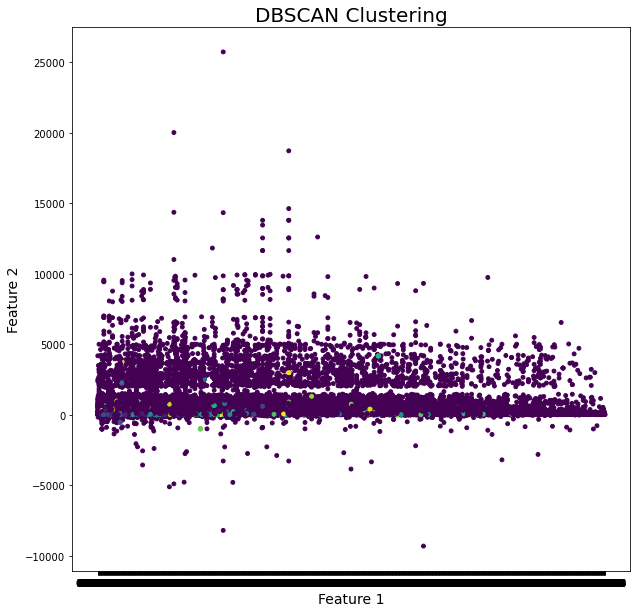

In [249]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import random


dbscan = DBSCAN()
dbscan.fit(full_data[["Employee Number","Expense Amount"]])
full_data['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(full_data["Employee Number"],full_data["Expense Amount"],c=full_data['DBSCAN_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [250]:
data = pd.read_csv("/Users/vinay/Documents/Y2 Semester 2/BACxDeloitte Hackathon/Credit Card Data.csv")
data = data.drop(["Vendor Location", "Vendor Name", "Custom Merchant Category", "Comment", "Expense Date", "Status", "Tax Code","Country"], axis=1)
data


/Users/vinay/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Employee Number,Company,Creditor Merchant Category,Expense Amount,Net Amount,Tax Amount,Authorised By,Transaction ID
0,0037057,3000,QUICKPAYMENT SERVICE-FAST FOOD,4195.25,3813.86,381.39,77779848.0,28196
1,0036544,3000,"STATIONERY, OFFICE AND SCHOOL",73.68,66.98,6.70,NaN,20352761
2,0049488,3000,"EATING PLACES, RESTAURANTS",47.40,43.09,4.31,NaN,4785
3,0075033,3000,HARDWARE STORES,47.40,43.09,4.31,NaN,74976
4,0038274,3000,"SUPERMARKETS, GROCERCY AND GEN",47.40,43.09,4.31,NaN,0
...,...,...,...,...,...,...,...,...
67337,37017,3000,"FIRE DEPTS, OTHER MISC GOVERNM",46.20,42.00,4.20,NaN,C9082757
67338,37448,3000,"FIRE DEPTS, OTHER MISC GOVERNM",46.20,42.00,4.20,NaN,328073244
67339,55485,3000,"FIRE DEPTS, OTHER MISC GOVERNM",46.20,42.00,4.20,NaN,62517
67340,38700,3000,"FIRE DEPTS, OTHER MISC GOVERNM",46.20,42.00,4.20,NaN,9006603


In [251]:
data.fillna(method = "ffill", inplace = True)
print(data.head())


  Employee Number  Company      Creditor Merchant Category  Expense Amount  \
0         0037057     3000  QUICKPAYMENT SERVICE-FAST FOOD         4195.25   
1         0036544     3000  STATIONERY, OFFICE AND SCHOOL            73.68   
2         0049488     3000      EATING PLACES, RESTAURANTS           47.40   
3         0075033     3000                 HARDWARE STORES           47.40   
4         0038274     3000  SUPERMARKETS, GROCERCY AND GEN           47.40   

   Net Amount  Tax Amount  Authorised By Transaction ID  
0     3813.86      381.39     77779848.0          28196  
1       66.98        6.70     77779848.0       20352761  
2       43.09        4.31     77779848.0           4785  
3       43.09        4.31     77779848.0          74976  
4       43.09        4.31     77779848.0              0  


In [271]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data_scaled = scalar.fit_transform(data)

data_normalised = normalize(data_scaled)
data_normalised = pd.DataFrame(data_normalised)

ValueError: could not convert string to float: '020186A'

In [253]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_principal = pca.fit_transform(data_normalised)
data_principal = pd.DataFrame(data_principal)
data_principal.columns = ['P1', 'P2']
print(data_principal.head())

         P1        P2
0  0.393051  0.893022
1  0.910709 -0.373270
2  0.932246 -0.318146
3  0.958211 -0.138629
4  0.902259 -0.380575


In [254]:
# Building the Clustering Model

db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(data_principal)
labels = db_default.labels_

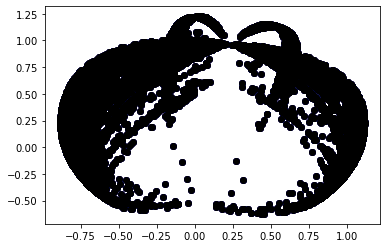

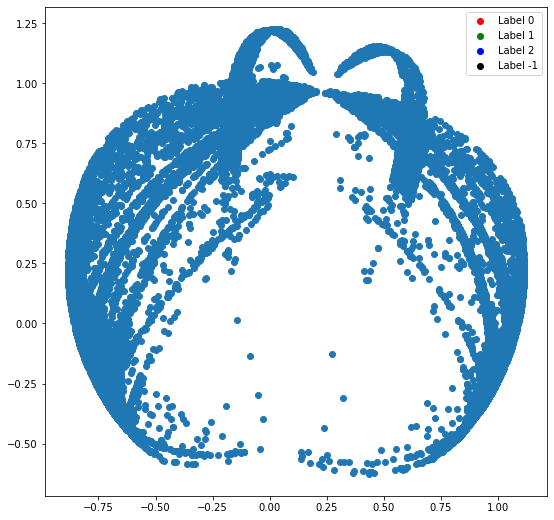

<Figure size 432x288 with 0 Axes>

In [256]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point
#cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(data_principal['P1'], data_principal['P2'], color ='r');
g = plt.scatter(data_principal['P1'], data_principal['P2'], color ='g');
b = plt.scatter(data_principal['P1'], data_principal['P2'], color ='b');
k = plt.scatter(data_principal['P1'], data_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(data_principal['P1'], data_principal['P2'])
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()
plt.savefig("item2.png")

In [229]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(data_principal)
labels1 = db.labels_

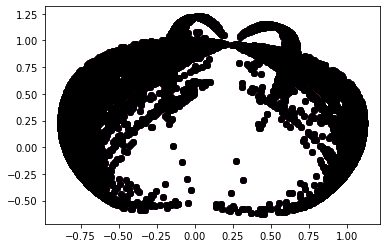

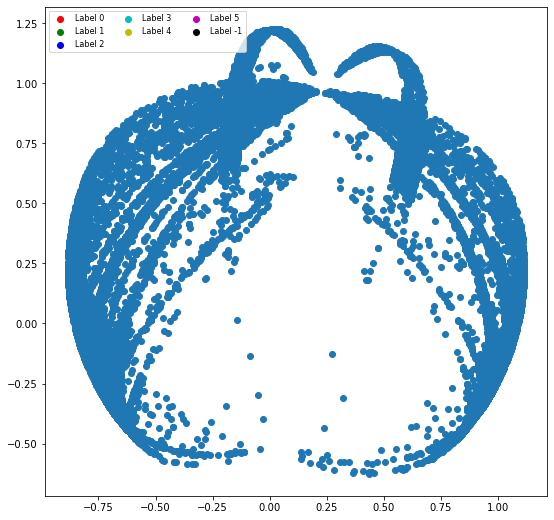

In [233]:
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
#cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]
  
r = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[0])
g = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[1])
b = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[2])
c = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[3])
y = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[4])
m = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[5])
k = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[6])
  
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], data_principal['P2'])
plt.legend((r, g, b, c, y, m, k),
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4',
            'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()

In [262]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(full_data[["Employee Number","Expense Amount"]])
distances, indices = nbrs.kneighbors(full_data[["Employee Number","Expense Amount"]])


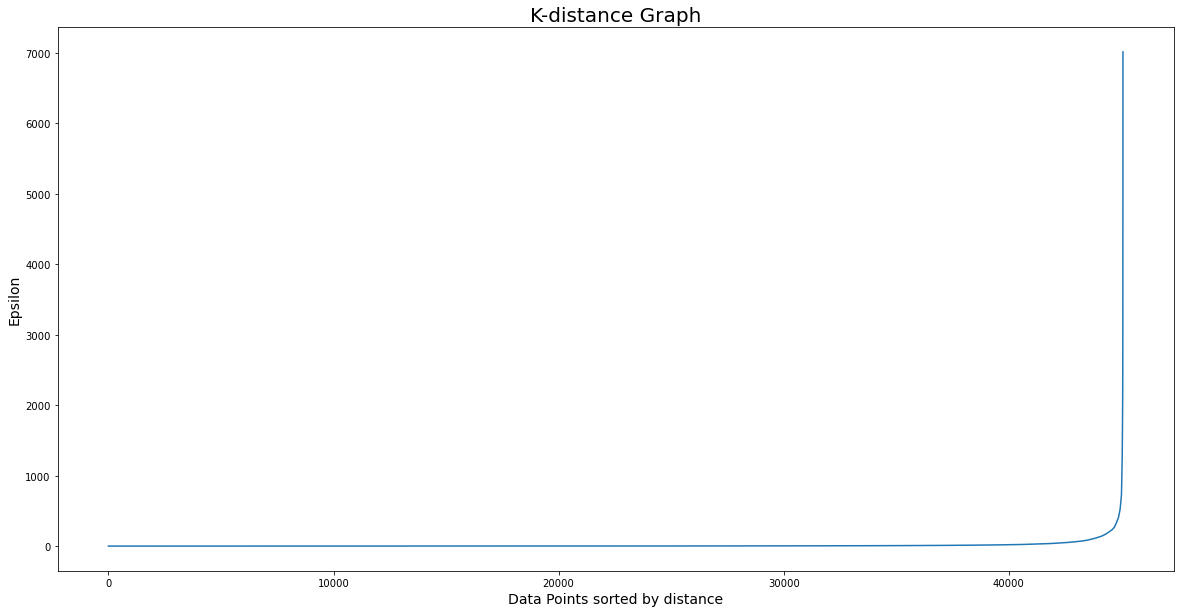

<Figure size 432x288 with 0 Axes>

In [263]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()
plt.savefig("item3.png")

In [264]:
from sklearn.cluster import DBSCAN
dbscan_opt = DBSCAN(eps = 300, min_samples = 2)
dbscan_opt.fit(full_data[["Employee Number","Expense Amount"]])

DBSCAN(eps=300, min_samples=2)

In [265]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
clusters = []
homogenity = []
completeness = []

for i in range(100,1000,50):
    dbscan_opt = DBSCAN(eps = i, min_samples = 2)
    dbscan_opt.fit(full_data[["Employee Number","Expense Amount"]])
    full_data['DBSCAN_opt_labels']=dbscan_opt.labels_
    full_data['DBSCAN_opt_labels'].value_counts()
    y_pred = dbscan_opt.labels_
    y = full_data["Expense Amount"]
    clusters.append(len(set(y_pred[np.where(y_pred != -1)])))
    homogenity.append(metrics.homogeneity_score(y, y_pred))
    completeness.append(metrics.completeness_score(y, y_pred))
#     print(i)
#     print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
#     print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
#     print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))

/Users/vinay/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/vinay/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/vinay/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/vinay/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass 

/Users/vinay/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/vinay/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/vinay/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/vinay/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass 

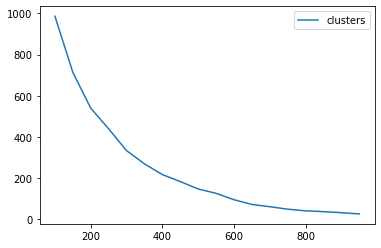

<Figure size 432x288 with 0 Axes>

In [268]:
x = list(range(100,1000,50))
#plt.plot(x,homogenity, label= "homongenity")
#plt.plot(x, completeness, label = "completeness")
plt.plot(x, clusters, label = "clusters")
plt.legend()
plt.show()
plt.savefig("item4.png")

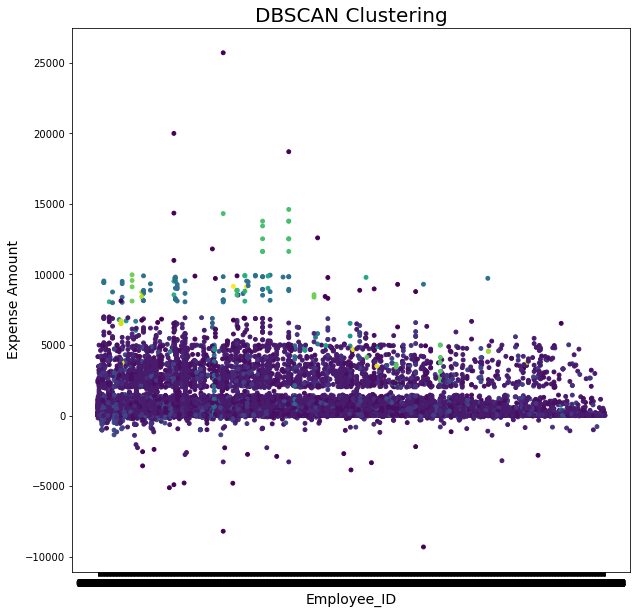

<Figure size 432x288 with 0 Axes>

In [270]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(full_data["Employee Number"],full_data["Expense Amount"],c=full_data['DBSCAN_opt_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Employee_ID',fontsize=14)
plt.ylabel('Expense Amount',fontsize=14)
plt.show()
plt.savefig("item6.png")

In [243]:
from sklearn import metrics
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

Number of clusters: 27
Homogeneity: 0.10060062938514605
Completeness: 0.5737545498405136


/Users/vinay/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/vinay/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


## END OF MACHINE LEARNING CODE
